In [74]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv('/content/audi.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


Print the information of csv file

In [ ]:
df=df[['model','year','transmission','fuelType','mileage','tax','mpg','engineSize','price']]
print(df)
print(df.info())

      model  year transmission fuelType  mileage  tax   mpg  engineSize  price
0        A1  2017       Manual   Petrol    15735  150  55.4         1.4  12500
1        A6  2016    Automatic   Diesel    36203   20  64.2         2.0  16500
2        A1  2016       Manual   Petrol    29946   30  55.4         1.4  11000
3        A4  2017    Automatic   Diesel    25952  145  67.3         2.0  16800
4        A3  2019       Manual   Petrol     1998  145  49.6         1.0  17300
...     ...   ...          ...      ...      ...  ...   ...         ...    ...
10663    A3  2020       Manual   Petrol     4018  145  49.6         1.0  16999
10664    A3  2020       Manual   Petrol     1978  150  49.6         1.0  16999
10665    A3  2020       Manual   Petrol      609  150  49.6         1.0  17199
10666    Q3  2017    Automatic   Petrol     8646  150  47.9         1.4  19499
10667    Q3  2016       Manual   Petrol    11855  150  47.9         1.4  15999

[10668 rows x 9 columns]
<class 'pandas.core.frame.

In [ ]:
df['year'] = df['year'].astype(object)
df.isnull().sum()
print(df.dtypes)

model            object
year             object
transmission     object
fuelType         object
mileage           int64
tax               int64
mpg             float64
engineSize      float64
price             int64
dtype: object


In [ ]:
df.corr()["price"].sort_values()

mpg          -0.600334
mileage      -0.535357
tax           0.356157
engineSize    0.591262
price         1.000000
Name: price, dtype: float64

Print the unique values of fuel type and plot a bar graph

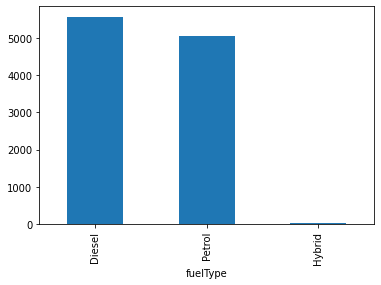

In [ ]:
df.value_counts(df["fuelType"]).plot.bar()


count plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


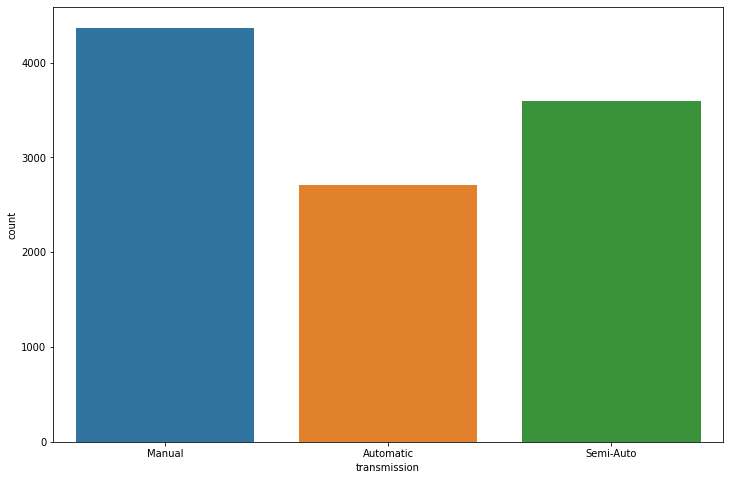

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df["transmission"])

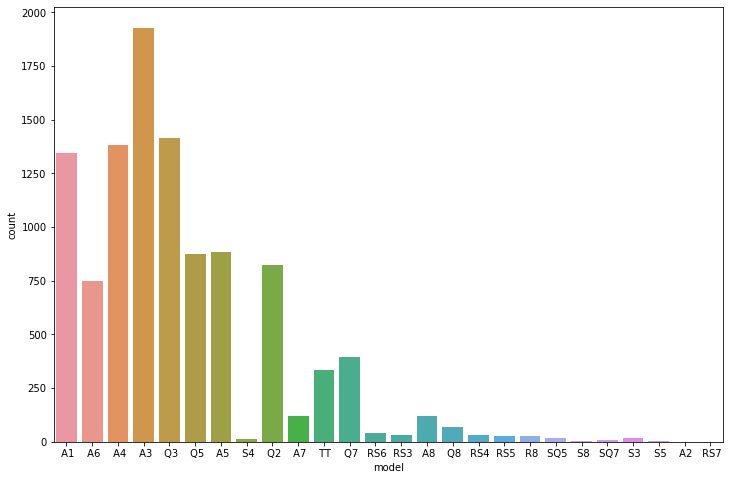

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x = df["model"].T )

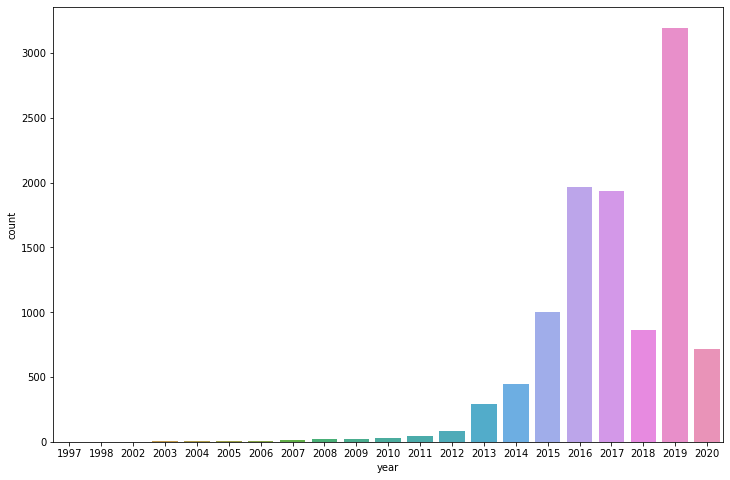

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x = df["year"].T )

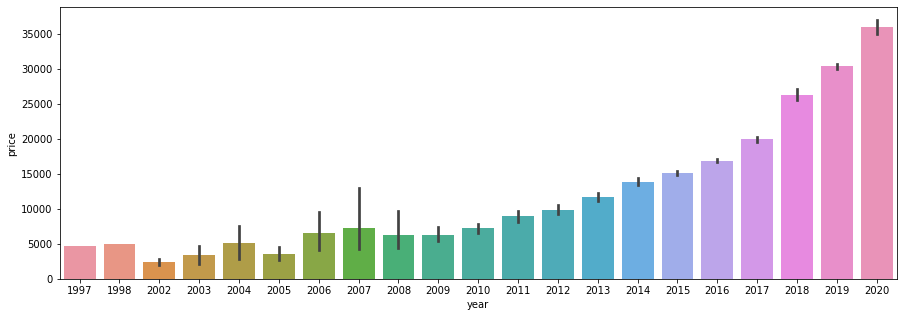

In [ ]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.barplot(x = df["year"], y = df["price"])

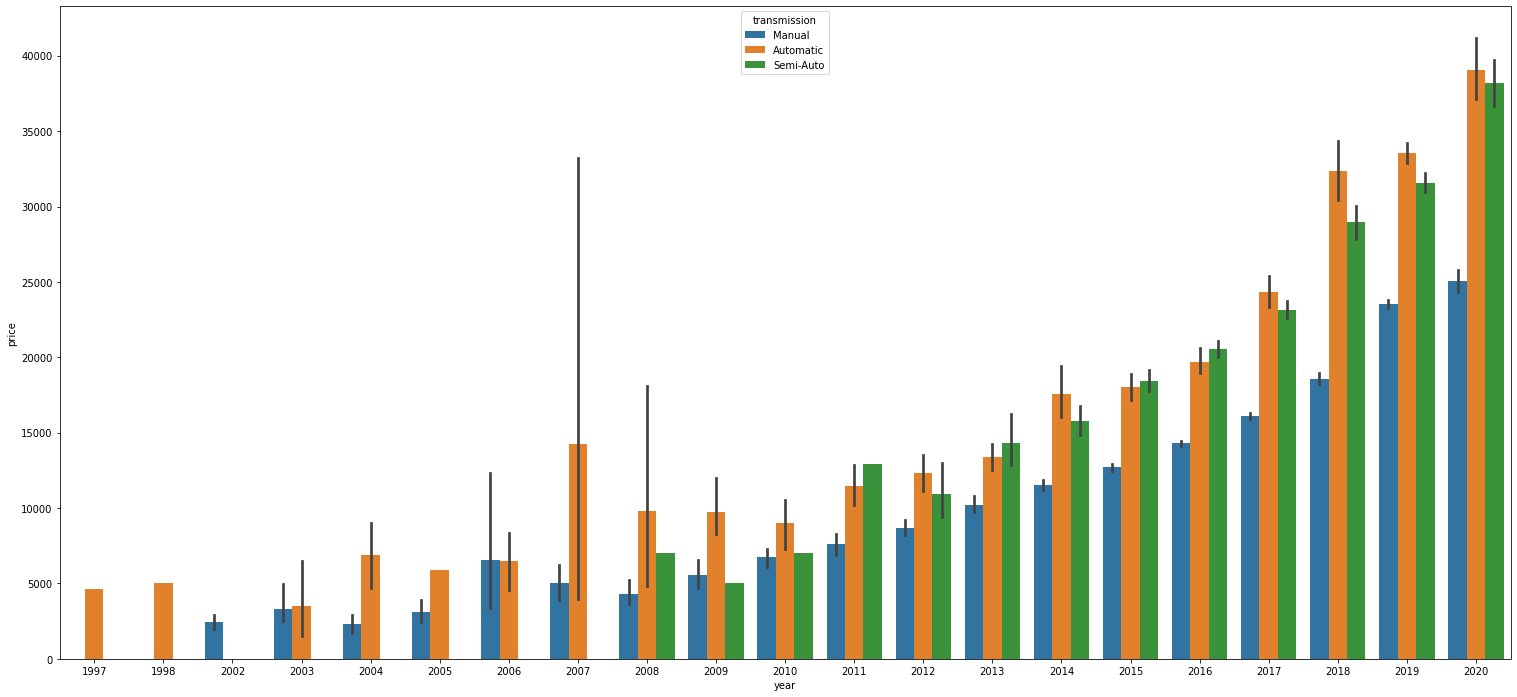

In [ ]:
plt.figure(figsize=(26,12),facecolor='w') 
sns.barplot(x = df["year"], y = df["price"] ,hue=df["transmission"])

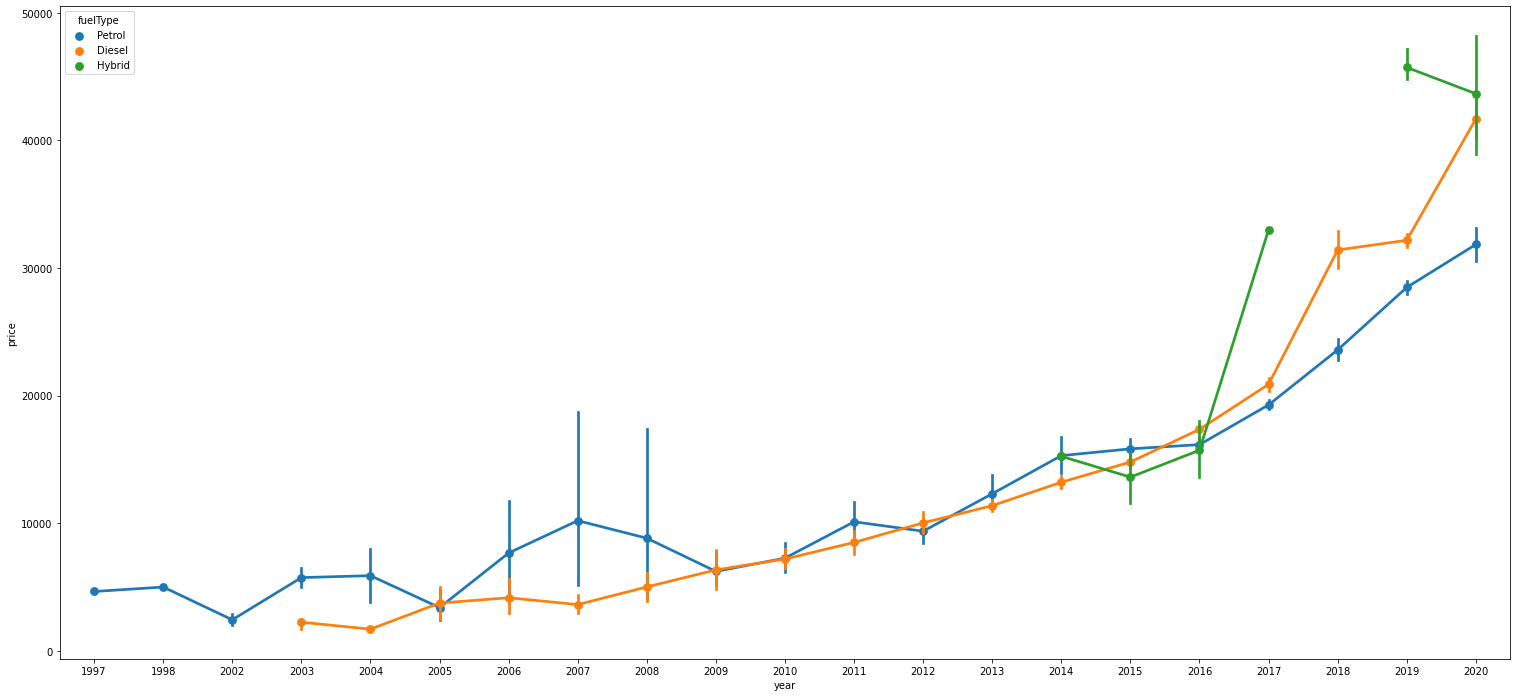

In [ ]:
plt.figure(figsize=(26,12),facecolor='w') 
sns.pointplot(x = df["year"], y = df["price"] ,hue=df["fuelType"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


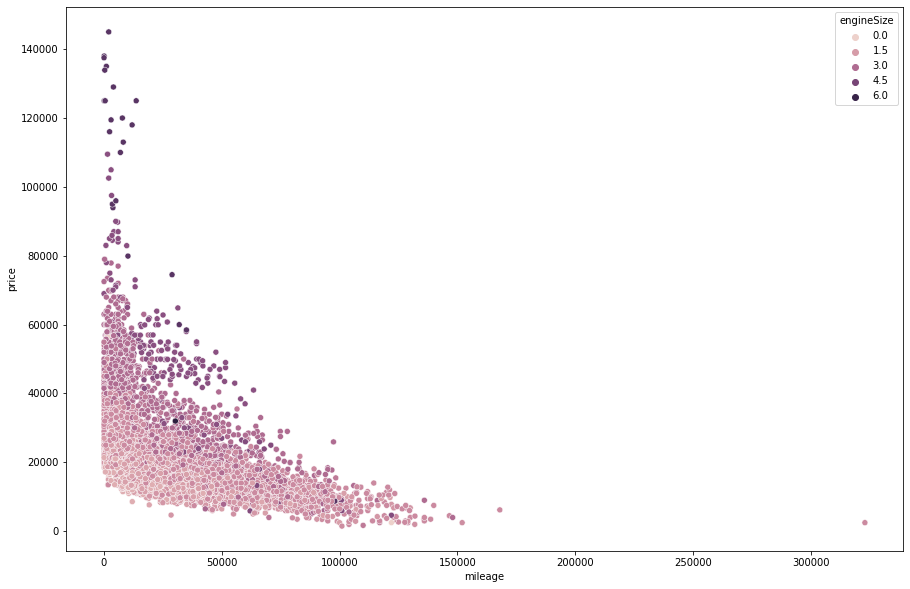

In [ ]:
plt.figure(figsize=(15,10)) 
sns.scatterplot(df["mileage"], df["price"], hue = df["engineSize"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


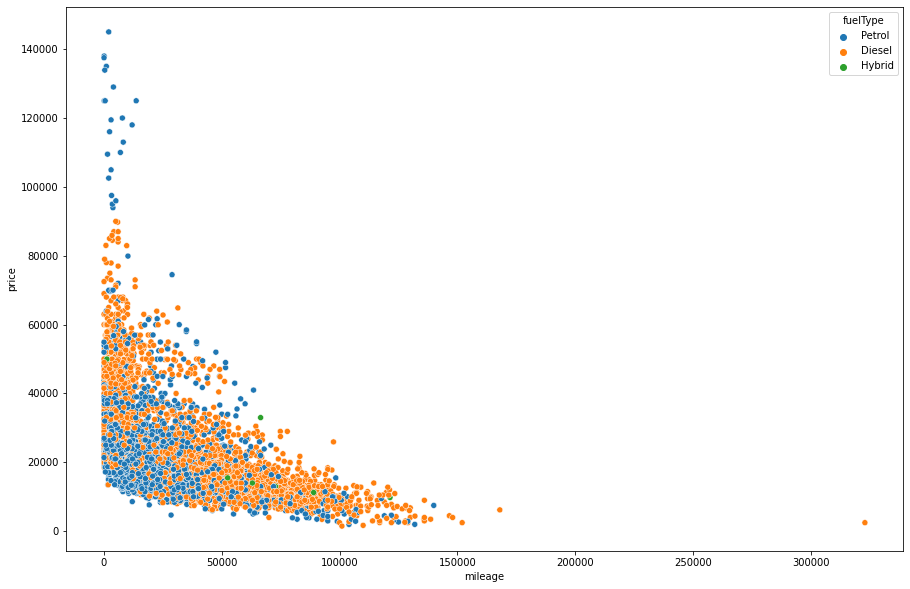

In [ ]:
plt.figure(figsize=(15,10)) 
sns.scatterplot(df["mileage"], df["price"], hue = df["fuelType"])

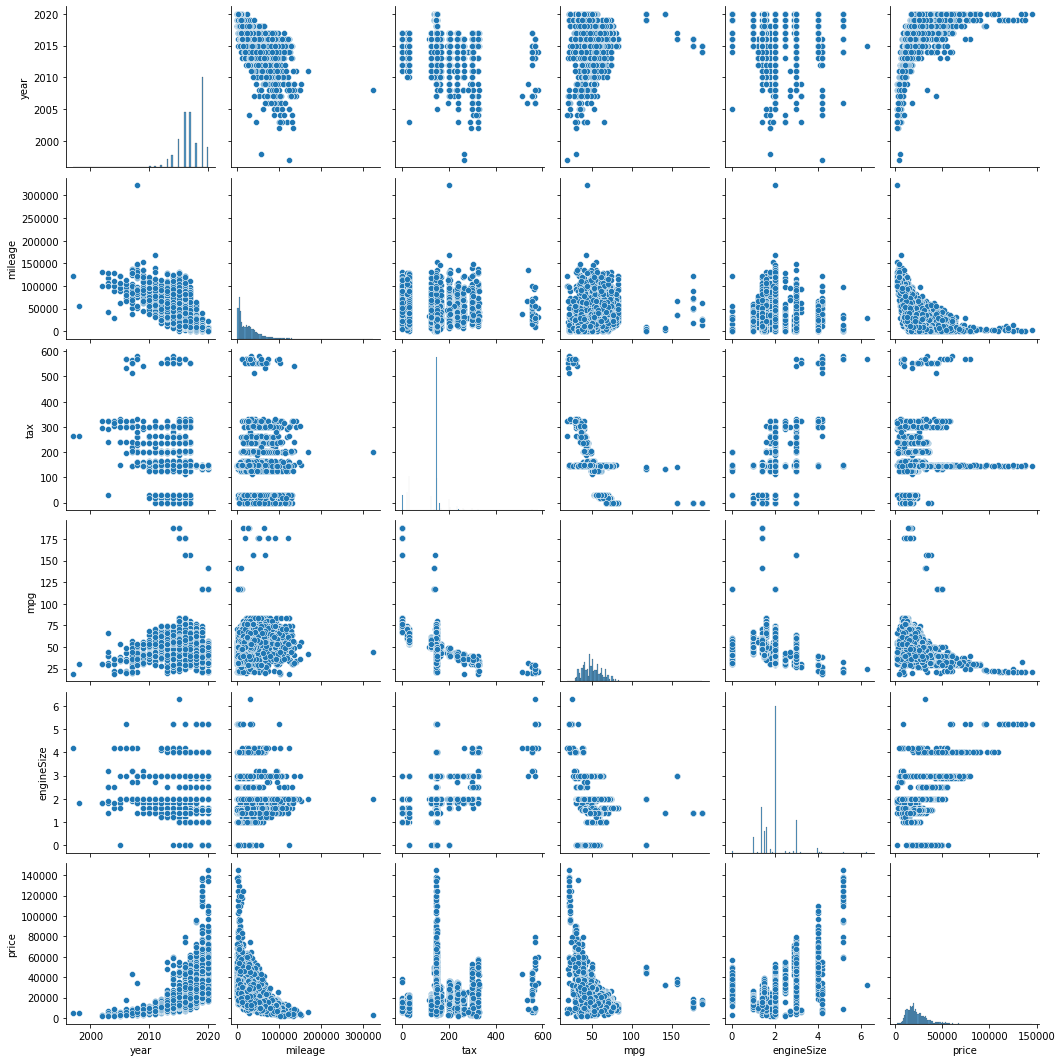

In [ ]:
sns.pairplot(df)

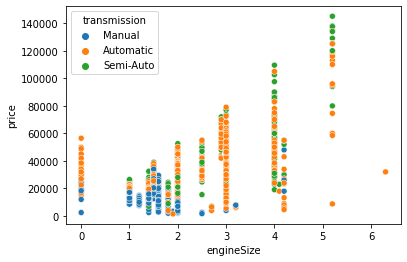

In [ ]:
sns.scatterplot(y='price', x='engineSize', data=df, hue='transmission')
plt.show()

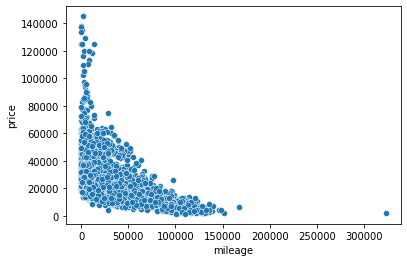

In [ ]:
sns.scatterplot(y='price', x='mileage', data=df)
plt.show()

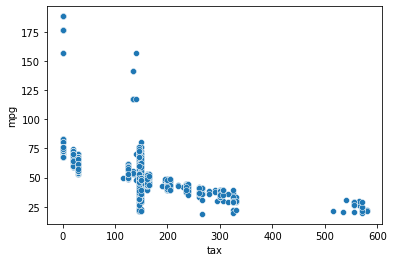

In [ ]:
sns.scatterplot(y='mpg', x='tax', data=df)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

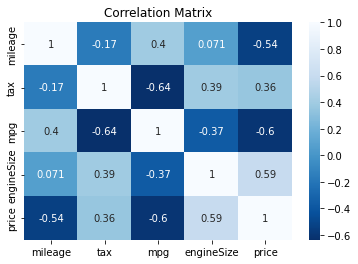

In [ ]:
sns.heatmap(df.corr(), cmap='Blues_r', annot=True)
plt.title('Correlation Matrix')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


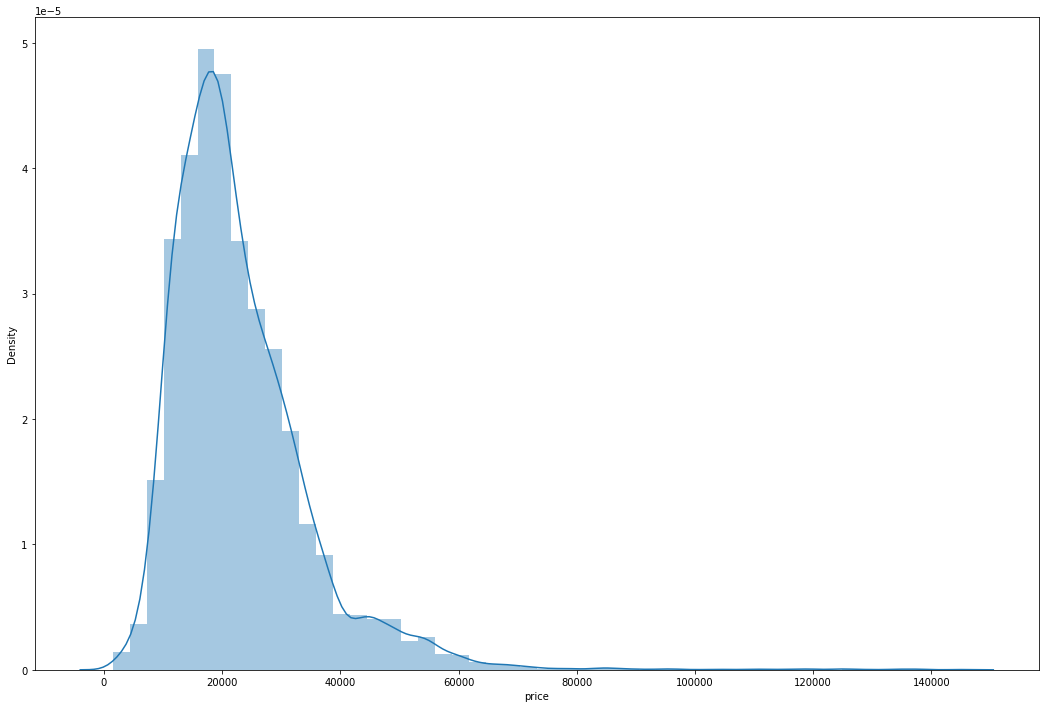

In [ ]:
plt.figure(figsize=(18,12))
sns.distplot(df["price"])
plt.show()

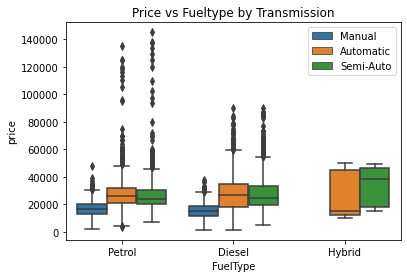

In [ ]:

sns.boxplot(x='fuelType', y='price', data=df, hue='transmission');
plt.xlabel('FuelType');
plt.legend(loc='upper right')
plt.title('Price vs Fueltype by Transmission');

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import iqr

In [ ]:
def plots(df,col):
    fig, ax = plt.subplots(1, 2, figsize=(6,4))
    ax[0].hist(df[col])
    ax[0].set_title(col + ' hist')
    ax[1].boxplot(df[col])
    ax[1].set_title(col + ' boxplot')
    plt.show()

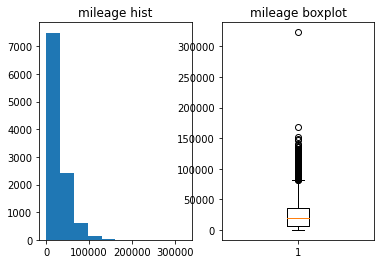

In [ ]:
plots(df, 'mileage')

In [ ]:
upper_limit = df['mileage'].quantile(0.99)
lower_limit = df['mileage'].quantile(0.01)
new_df = df[(df['mileage'] <= upper_limit) & (df['mileage'] >=lower_limit)]
new_df

,model,year,transmission,fuelType,mileage,tax,mpg,engineSize,price
0,A1,2017,Manual,Petrol,15735,150,55.4,1.4,12500
1,A6,2016,Automatic,Diesel,36203,20,64.2,2.0,16500
2,A1,2016,Manual,Petrol,29946,30,55.4,1.4,11000
3,A4,2017,Automatic,Diesel,25952,145,67.3,2.0,16800
4,A3,2019,Manual,Petrol,1998,145,49.6,1.0,17300
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,Manual,Petrol,4018,145,49.6,1.0,16999
10664,A3,2020,Manual,Petrol,1978,150,49.6,1.0,16999
10665,A3,2020,Manual,Petrol,609,150,49.6,1.0,17199
10666,Q3,2017,Automatic,Petrol,8646,150,47.9,1.4,19499


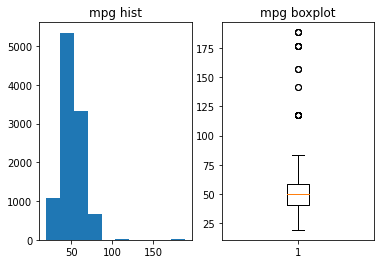

In [ ]:
plots(new_df, 'mpg')

In [ ]:
new_df=pd.get_dummies(new_df, drop_first=True)
new_df.head()

,mileage,tax,mpg,engineSize,price,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,model_ A8,model_ Q2,model_ Q3,model_ Q5,model_ Q7,model_ Q8,model_ R8,model_ RS3,model_ RS4,model_ RS5,model_ RS6,model_ RS7,model_ S3,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
0,15735,150,55.4,1.4,12500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,36203,20,64.2,2.0,16500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,29946,30,55.4,1.4,11000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,25952,145,67.3,2.0,16800,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1998,145,49.6,1.0,17300,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


## MODEL EVALUATION

In [67]:
X=new_df.drop('price', axis = 1).values
y=new_df['price'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)          
X_test = scaler.transform(X_test)


In [68]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor().fit(X_train, y_train)
print(knn_model)
print(knn_model.n_neighbors)
y_pred = knn_model.predict(X_test)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
5


In [69]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_test, y_pred))

2853.232274344832

In [71]:
r2_score(y_test, y_pred)

0.9353225212917018

In [72]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

k = 1 için RMSE değeri:  561.8942260193278
k = 2 için RMSE değeri:  1506.1806287765335
k = 3 için RMSE değeri:  1856.172807957033
k = 4 için RMSE değeri:  2057.375255743943
k = 5 için RMSE değeri:  2226.520498235453
k = 6 için RMSE değeri:  2399.965701228354
k = 7 için RMSE değeri:  2557.8888283391598
k = 8 için RMSE değeri:  2696.456064674319
k = 9 için RMSE değeri:  2824.0353449708077
k = 10 için RMSE değeri:  2937.2353347906687
